# Solution proposée dans l'article
## Modèle en cas de non imigration

In [120]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import myModule as myM
import seaborn as sns

\begin{equation}
    \left\{\begin{array}{l}
        \frac{\mathrm{d}x_1}{\mathrm{d}t} =	- \alpha x_1 y - \lambda x_1	\\
        \frac{\mathrm{d}y}{\mathrm{d}t} =	e_1\alpha x_1 y + \gamma w -\delta y - \mu_y y	\\
        \frac{\mathrm{d}z}{\mathrm{d}t} =	\delta y - \mu_z z	\\
        \frac{\mathrm{d}w}{\mathrm{d}t} =	\rho z - \gamma w - \mu_w w	\\
    \end{array}\right.
    \label{eq1}
\end{equation}

In [121]:
def pop_dyn_nim(t, pop, rates=None):
    if rates is None:
        rates = []
    x = pop[0]  # Maize population
    y = pop[1]  # larvae population
    z = pop[2]  # caterpillar population
    w = pop[3]  # eggs population

    an = rates[0]    # $\alpha$ or $\eta$
    l = rates[1]     # $\lambda$
    ga = rates[2]    # $\gamma$
    d =  rates[3]    # $\delta$
    rh = rates[4]    # $\rho$
    my = rates[5]    # $\mu_y$
    mz = rates[6]    # $\mu_z$
    mw = rates[7]    # $\mu_w$
    e = rates[8]     # $e$

    f = lambda x: -l * x #* (x / 400 - 1)
    g = lambda x: an * x #/ (0.05*t + 1)
    dx = f(x) - g(x) * y
    dy = e * g(x) * y + ga*w - (d+my) * y
    dz = d*y - mz*z
    dw = rh*z - (ga + mw) * w

    return np.array([dx, dy, dz, dw])

## A little verification of RK4

In [122]:
y0 = np.array([2,1])

def f(t, y):
    y1 = np.array([y[1], -y[0] + 2 * y[1]])
    return  y1

Text(0.5, 1.0, 'RK4')

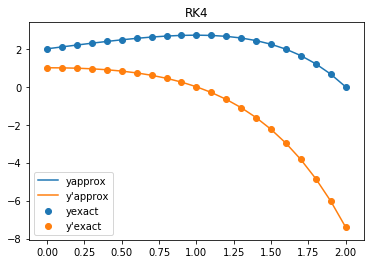

In [123]:
plt.figure()
t,y = myM.RK4(f, [0,2], y0, 20, False)
plt.plot(t, y)
yex = lambda x: np.array([(2 - x) * np.exp(x), (1 - x) * np.exp(x)])
plt.scatter(t, np.transpose(yex(t))[:,0])
plt.scatter(t, np.transpose(yex(t))[:,1])
plt.legend(["yapprox", "y'approx", "yexact", "y'exact"])
plt.title('RK4')

## RK4 applying on our function of population distribution
### Function compatible with RKR format

In [124]:
#def pop_dyn(t, p):

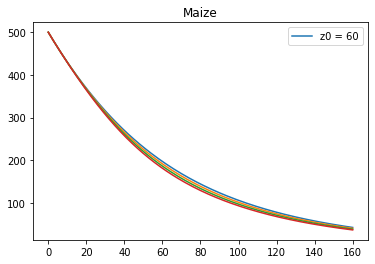

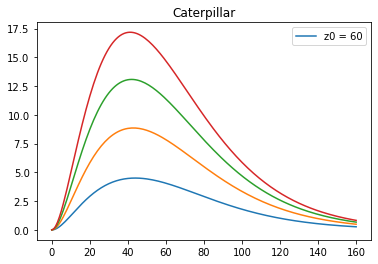

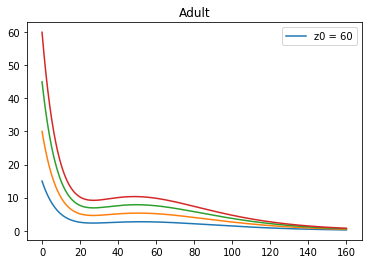

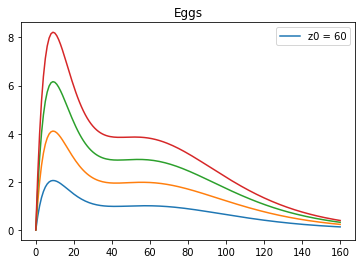

In [125]:
# initialisation
k = 500
y0 = 0
z0 = np.array([15, 30, 45, 60])
w0 = 0

r = 0.0417
d = 0.071
ga = 0.071
my = 0.0071
mz = 0.115
mw = 0.04
l = 0.015
e = 1.6
an = 0.000154

rate = np.array([an, l, ga, d, r, my, mz, mw, e])

t0 = 0
t1 = 63
T = 160

I1 = [t0,T]
leg = ['Maize', 'Caterpillar', 'Adult', 'Eggs']
for i in range(z0.size):
    s0 = np.array([k, y0, z0[i], w0])
    t,x = myM.RK4(lambda x,y: pop_dyn_nim(x,y, rate), I1, s0, I1[-1])

    for j in range(4):
        plt.figure(j)
        plt.plot(t, x[:,j])
        plt.title(leg[j])
        plt.legend(["z0 = {}".format(z0[i])])

# Simulation of my model

[[3.00000000e+02 0.00000000e+00 6.00000000e+01 0.00000000e+00]
 [2.99772371e+02 1.87863169e-01 5.34909971e+01 5.35912483e+00]
 [2.99529677e+02 6.62557283e-01 4.77362227e+01 9.57584419e+00]
 [2.99261412e+02 1.31498415e+00 4.26849792e+01 1.28392052e+01]
 [2.98961511e+02 2.06305831e+00 3.82790603e+01 1.53131949e+01]
 [2.98627208e+02 2.84630867e+00 3.44568866e+01 1.71388715e+01]
 [2.98258136e+02 3.62138643e+00 3.11565167e+01 1.84366076e+01]
 [2.97855608e+02 4.35835470e+00 2.83177732e+01 1.93083373e+01]
 [2.97422061e+02 5.03764785e+00 2.58836767e+01 1.98397348e+01]
 [2.96960628e+02 5.64760043e+00 2.38013476e+01 2.01022721e+01]
 [2.96474816e+02 6.18245693e+00 2.20225044e+01 2.01551263e+01]
 [2.95968266e+02 6.64078411e+00 2.05036627e+01 2.00469177e+01]
 [2.95444585e+02 7.02421782e+00 1.92061163e+01 1.98172742e+01]
 [2.94907223e+02 7.33648527e+00 1.80957685e+01 1.94982204e+01]
 [2.94359399e+02 7.58265250e+00 1.71428611e+01 1.91154008e+01]
 [2.93804058e+02 7.76855401e+00 1.63216433e+01 1.868914

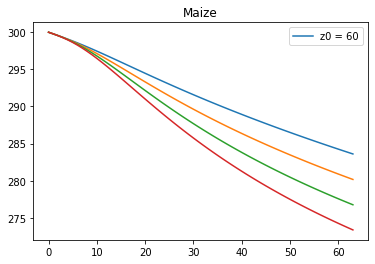

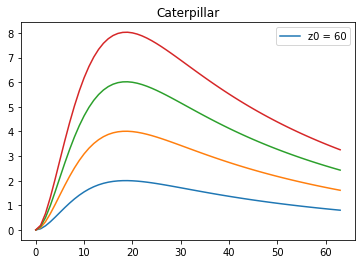

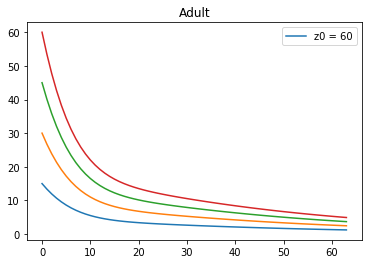

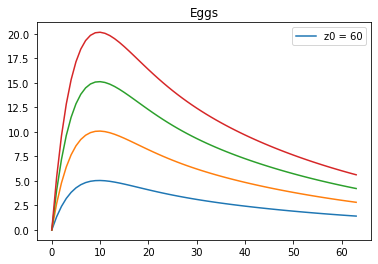

In [126]:
# initialisation
k = 300
y0 = 0
z0 = np.array([15, 30, 45, 60])
w0 = 0

r = 0.10#0.0417     # fertility rate
d = 0.071           # larvae -> adult
ga = 0.071          # egg -> larvae
my = 0.0071         # larvae mortality rate
mz = 0.115          # adult mortality rate
mw = 0.04           # egg mortality rate
l = 0.0015 #0.015   # maize mortality rate due to climatic condition
e = 1.6             # larvae growth or survival rate per plant consumption
an = 0.000154       # destruction of plant per larvae over time
tau = 0.1          # resistance rate of the plant over time
sig = 0.01          # migration rate of adult
s = k/3             # threshold

rate = np.array([an, l, ga, d, r, my, mz, mw, e, tau, sig, s])

t0 = 0
t1 = 63
T = 160

I1 = [t0,t1]
leg = ['Maize', 'Caterpillar', 'Adult', 'Eggs']
for i in range(z0.size):
    s0 = np.array([k, y0, z0[i], w0])
    t,x = myM.RK4(lambda x,y: myM.pop_dyn_myMod(x,y, rate), I1, s0, I1[-1])

    for j in range(4):
        plt.figure(j)
        plt.plot(t, x[:,j])
        plt.title(leg[j])
        plt.legend(["z0 = {}".format(z0[i])])

print(x)